# Linear Regression


In [ ]:
Отображение зависимости одних переменных от других.
Зависимые данные = зависимые переменные = выходы = ответы (~1)
Независимые данные = независимые переменные = входы = предсказатели


# Libreries

In [ ]:
класс LinearRegression - для линйной регрессии и прогнозов
класс train_test_split - для кроссвалидации
класс normalize - для нормализации данных (данные в диапозоне от 0 до 1)
класс shapiro/scipy - для статистических методов ( проверка на  нормальность)

In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro
from math import sqrt

In [1]:
Чтение данных и вывод

In [4]:
ds=pd.read_csv('../input/house-prices-dataset/test.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
Выбор прогнозируемых и обучаемых данных

In [7]:
X_NAME = "MSSubClass"
Y_NAME = "PoolArea"

x = ds[X_NAME].values.reshape(-1, 1)
y = ds[Y_NAME].values.reshape(-1, 1)

In [ ]:
Кроссвалидация 1:3

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
Построение модели, как экземпляра класса LinearRegression
коэф регрессии отрицателный

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Коэф. регрессии
print("regressor.intercept_ = {0}, regressor.coef_ = {1}".format(regressor.intercept_, regressor.coef_))

# Построение прогноза
y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})

regressor.intercept_ = [2.37634023], regressor.coef_ = [[-0.00661257]]


In [ ]:
Вывод графиков

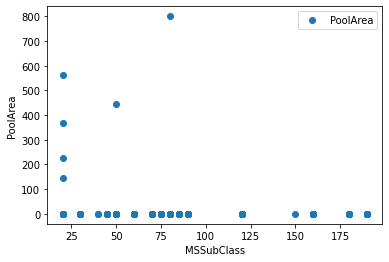

In [10]:
def draw_graph(data_set: pd.core.frame.DataFrame):
  
    data_set.plot(x=X_NAME, y=Y_NAME, style="o")
    plt.xlabel(X_NAME)
    plt.ylabel(Y_NAME)
    plt.show()

draw_graph(ds)


In [ ]:
def draw_reg(xt: np.ndarray, yt: np.ndarray, yp: np.ndarray, color: str):
    
    plt.scatter(xt, yt)
    plt.plot(xt, yp, color=color, linewidth="2")
    plt.xlabel(X_NAME)
    plt.ylabel(Y_NAME)
    plt.show()
draw_reg(x_test, y_test, y_pred, "green")